In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import sklearn.model_selection as skm
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          plot_tree,
                          export_text)
from sklearn.ensemble import (RandomForestClassifier as RFC)
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv('data.csv', sep=';')
features = list(data.columns)
classes = set(data['Target'])
X = data.drop('Target', axis=1)
y = data['Target']



# Splitting dataset

In [ ]:
# Split the data into train, validation, and test sets
X_train, X_test, y_train, y_test = skm.train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
X_train_new, X_val, y_train_new, y_val = skm.train_test_split(X_train, y_train, test_size=0.125, stratify=y_train, random_state=0)

# Applyign tree based methods


## Bagging

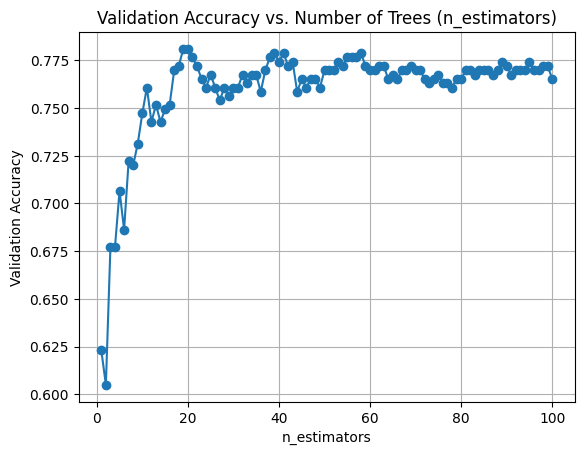

Best n_estimators: 19, Test set accuracy: 0.7695


In [ ]:
n_estimators_range = np.arange(1, 101)
val_accuracies = []

for n_estimators in n_estimators_range:
    clf = RFC(n_estimators=n_estimators, criterion='entropy', max_features=X_train.shape[1], random_state=0)
    clf.fit(X_train_new, y_train_new)

    val_accuracy = accuracy_score(y_val, clf.predict(X_val))
    val_accuracies.append(val_accuracy)

best_idx = np.argmax(val_accuracies)
best_n_estimators = n_estimators_range[best_idx]
best_clf = RFC(n_estimators=best_n_estimators, criterion='entropy', max_features=X_train.shape[1], random_state=0)
best_clf.fit(X_train_new, y_train_new)

plt.plot(n_estimators_range, val_accuracies, marker='o')
plt.title('Validation Accuracy vs. Number of Trees (n_estimators)')
plt.xlabel('n_estimators')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()

test_accuracy = accuracy_score(y_test, best_clf.predict(X_test))
print(f'Best n_estimators: {best_n_estimators}, Test set accuracy: {test_accuracy:.4f}')



## Random Forest

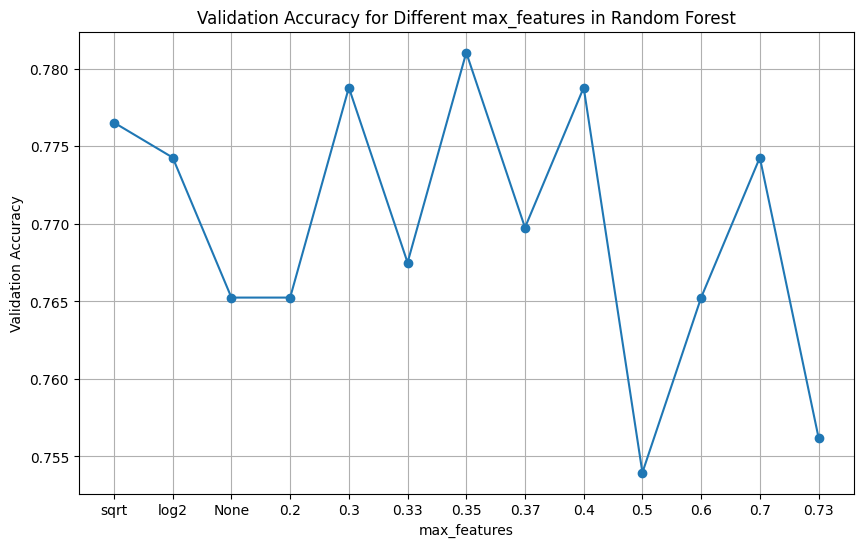

Best max_features based on validation set: 0.35
Train set accuracy: 1.0000
Test set accuracy: 0.7763


In [ ]:
max_features_values = ['sqrt', 'log2', None, 0.2, 0.3,0.33, 0.35, 0.37, 0.4, 0.5, 0.6, 0.7, 0.73]

validation_accuracies = [
    accuracy_score(y_val, RFC(criterion='entropy', max_features=mf, random_state=0).fit(X_train_new, y_train_new).predict(X_val))
    for mf in max_features_values
]

plt.figure(figsize=(10, 6))
plt.plot([str(mf) for mf in max_features_values], validation_accuracies, marker='o')
plt.xlabel('max_features')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for Different max_features in Random Forest')
plt.grid(True)
plt.show()

best_max_features = max_features_values[np.argmax(validation_accuracies)]
best_clf = RFC(criterion='entropy', max_features=best_max_features, random_state=0).fit(X_train, y_train)

print(f'Best max_features based on validation set: {best_max_features}')
print(f'Train set accuracy: {accuracy_score(y_train, best_clf.predict(X_train)):.4f}')
print(f'Test set accuracy: {accuracy_score(y_test, best_clf.predict(X_test)):.4f}')

## Boosting

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Validation set accuracy with learning_rate=0.01, n_estimators=50: 0.6930


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Validation set accuracy with learning_rate=0.01, n_estimators=100: 0.7065


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Validation set accuracy with learning_rate=0.01, n_estimators=200: 0.7065


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Validation set accuracy with learning_rate=0.01, n_estimators=300: 0.7246


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Validation set accuracy with learning_rate=0.05, n_estimators=50: 0.7156


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Validation set accuracy with learning_rate=0.05, n_estimators=100: 0.7223


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Validation set accuracy with learning_rate=0.05, n_estimators=200: 0.7156


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Validation set accuracy with learning_rate=0.05, n_estimators=300: 0.7381


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Validation set accuracy with learning_rate=0.1, n_estimators=50: 0.7246


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Validation set accuracy with learning_rate=0.1, n_estimators=100: 0.7156


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Validation set accuracy with learning_rate=0.1, n_estimators=200: 0.7517


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Validation set accuracy with learning_rate=0.1, n_estimators=300: 0.7517


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Validation set accuracy with learning_rate=0.5, n_estimators=50: 0.7540


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Validation set accuracy with learning_rate=0.5, n_estimators=100: 0.7449


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Validation set accuracy with learning_rate=0.5, n_estimators=200: 0.7517


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Validation set accuracy with learning_rate=0.5, n_estimators=300: 0.7494


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Validation set accuracy with learning_rate=1, n_estimators=50: 0.7449


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Validation set accuracy with learning_rate=1, n_estimators=100: 0.7449


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Validation set accuracy with learning_rate=1, n_estimators=200: 0.7359


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Validation set accuracy with learning_rate=1, n_estimators=300: 0.7359

Best learning_rate: 0.5, Best n_estimators: 50, Validation accuracy: 0.7540


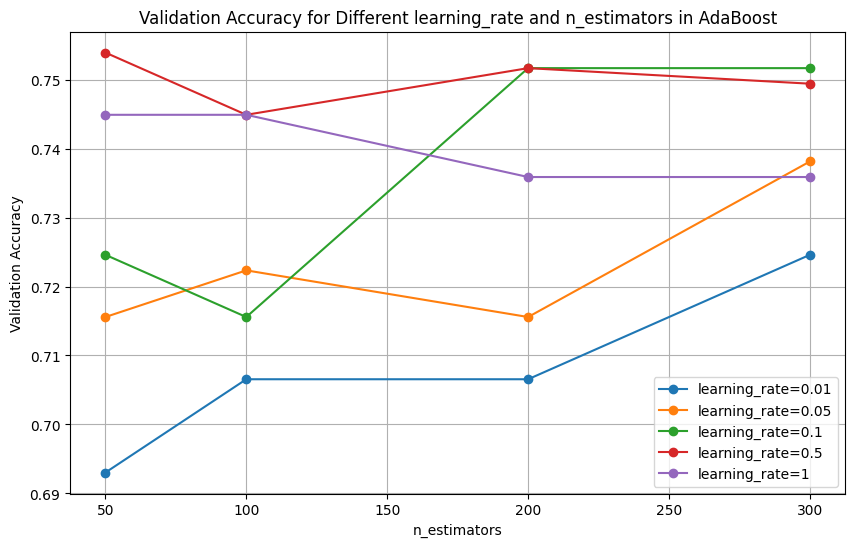

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Train set accuracy: 0.7635
Test set accuracy: 0.7605


In [ ]:
from sklearn.ensemble import AdaBoostClassifier as ABC
learning_rate_values = [0.01, 0.05, 0.1, 0.5, 1]
n_estimators_values = [50, 100, 200, 300]

# Store results
results = []

# Train classifiers with different parameters and evaluate
for lr in learning_rate_values:
    for n_est in n_estimators_values:
        clf = ABC(learning_rate=lr, n_estimators=n_est, random_state=0)
        clf.fit(X_train_new, y_train_new)
        val_accuracy = accuracy_score(y_val, clf.predict(X_val))
        results.append((lr, n_est, val_accuracy))
        print(f'Validation set accuracy with learning_rate={lr}, n_estimators={n_est}: {val_accuracy:.4f}')

# Find the best parameters
best_lr, best_n_est, best_val_acc = max(results, key=lambda x: x[2])
print(f'\nBest learning_rate: {best_lr}, Best n_estimators: {best_n_est}, Validation accuracy: {best_val_acc:.4f}')

# Plot results
results_array = np.array(results)
fig, ax = plt.subplots(figsize=(10, 6))
for lr in learning_rate_values:
    subset = results_array[results_array[:, 0] == lr]
    ax.plot(subset[:, 1], subset[:, 2], marker='o', label=f'learning_rate={lr}')
ax.set_xlabel('n_estimators')
ax.set_ylabel('Validation Accuracy')
ax.set_title('Validation Accuracy for Different learning_rate and n_estimators in AdaBoost')
ax.grid(True)
ax.legend()
plt.show()

# Train the best model on the full training set and evaluate on the test set
best_clf = ABC(learning_rate=best_lr, n_estimators=best_n_est, random_state=0)
best_clf.fit(X_train, y_train)

# Print final accuracies
print(f'Train set accuracy: {accuracy_score(y_train, best_clf.predict(X_train)):.4f}')
print(f'Test set accuracy: {accuracy_score(y_test, best_clf.predict(X_test)):.4f}')